In [2]:
!pip install -q matplotlib


[notice] A new release of pip is available: 23.3.1 -> 24.2
[notice] To update, run: python -m pip install --upgrade pip


Loading index file from /workspace/data/unsharded/document.idx...
Analyzing entry sizes...
Analysis of Entry Sizes:
Total number of entries: 146432000
Mean size: 2049.00
Median size: 2049.00
Standard deviation: 0.00
Minimum size: 2049
Maximum size: 2049


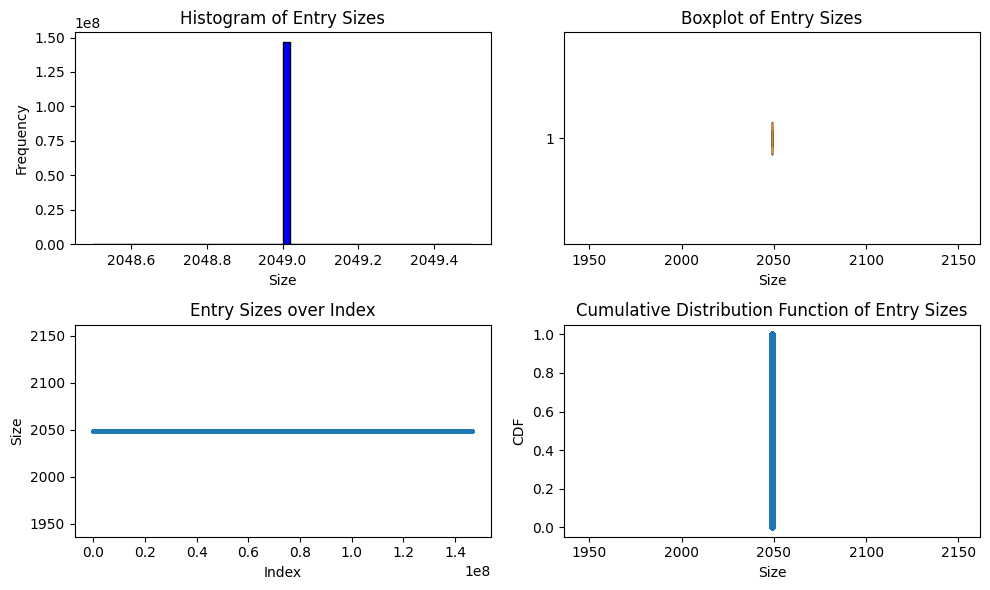

In [3]:
import os
import struct
import numpy as np
import matplotlib.pyplot as plt

# Hardcoded argument
load_path = "/workspace/data/unsharded/document.idx"

def load_index_file(index_path):
    with open(index_path, "rb") as f:
        magic_test = f.read(9)
        assert magic_test == b"MMIDIDX\x00\x00", "Index file doesn't match expected format."

        version = struct.unpack("<Q", f.read(8))[0]
        assert version == 1, "Unsupported index file version."

        dtype_code = struct.unpack("<B", f.read(1))[0]
        dtype = {
            1: np.uint8,
            2: np.int8,
            3: np.int16,
            4: np.int32,
            5: np.int64,
            6: np.float32,
            7: np.float64,
            8: np.uint16,
        }[dtype_code]

        length = struct.unpack("<Q", f.read(8))[0]
        doc_count = struct.unpack("<Q", f.read(8))[0]

        sizes = np.frombuffer(f.read(length * 4), dtype=np.int32)
        pointers = np.frombuffer(f.read(length * 8), dtype=np.int64)
        doc_idx = np.frombuffer(f.read(doc_count * 8), dtype=np.int64)

    return dtype, sizes, pointers, doc_idx

def analyze_sizes(sizes):
    print("Analysis of Entry Sizes:")
    print(f"Total number of entries: {len(sizes)}")
    print(f"Mean size: {np.mean(sizes):.2f}")
    print(f"Median size: {np.median(sizes):.2f}")
    print(f"Standard deviation: {np.std(sizes):.2f}")
    print(f"Minimum size: {np.min(sizes)}")
    print(f"Maximum size: {np.max(sizes)}")
    
    plt.figure(figsize=(10, 6))
    
    # Histogram of entry sizes
    plt.subplot(2, 2, 1)
    plt.hist(sizes, bins=50, color='blue', edgecolor='black')
    plt.title('Histogram of Entry Sizes')
    plt.xlabel('Size')
    plt.ylabel('Frequency')
    
    # Boxplot of entry sizes
    plt.subplot(2, 2, 2)
    plt.boxplot(sizes, vert=False)
    plt.title('Boxplot of Entry Sizes')
    plt.xlabel('Size')
    
    # Plotting sizes over indices
    plt.subplot(2, 2, 3)
    plt.plot(sizes, marker='o', linestyle='', markersize=2)
    plt.title('Entry Sizes over Index')
    plt.xlabel('Index')
    plt.ylabel('Size')
    
    # Cumulative distribution function (CDF)
    sorted_sizes = np.sort(sizes)
    cdf = np.arange(1, len(sorted_sizes) + 1) / len(sorted_sizes)
    plt.subplot(2, 2, 4)
    plt.plot(sorted_sizes, cdf, marker='.', linestyle='none')
    plt.title('Cumulative Distribution Function of Entry Sizes')
    plt.xlabel('Size')
    plt.ylabel('CDF')
    
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    print(f"Loading index file from {load_path}...")
    dtype, sizes, pointers, doc_idx = load_index_file(load_path)
    
    print("Analyzing entry sizes...")
    analyze_sizes(sizes)
